In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',0)
import warnings
warnings.filterwarnings('ignore')

In [124]:
df = pd.read_csv(r'Downloads/hotel_bookings.csv')

In [125]:
df.shape

(119390, 32)

In [126]:
df.size

3820480

In [127]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,10/21/2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [128]:
temp=pd.DataFrame(index=df.columns)
temp['Data_Types']=df.dtypes
temp['Null_Counts']=df.isnull().sum()/len(df)*100
temp['Unique_Counts'] = df.nunique()

In [129]:
temp

,Data_Types,Null_Counts,Unique_Counts
hotel,object,0.000000,2
is_canceled,int64,0.000000,2
lead_time,int64,0.000000,479
arrival_date_year,int64,0.000000,3
arrival_date_month,object,0.000000,12
arrival_date_week_number,int64,0.000000,53
arrival_date_day_of_month,int64,0.000000,31
stays_in_weekend_nights,int64,0.000000,17
stays_in_week_nights,int64,0.000000,35
adults,int64,0.000000,14


In [130]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [131]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [132]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [133]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [134]:
filter = (df['adults']==0) & (df['babies']==0) & (df['children']==0)

In [135]:
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [136]:
data = df[~filter]

In [137]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [138]:
resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.0,NaN,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,NaN,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [139]:
city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,NaN,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,NaN,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [140]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [141]:
x= resort['country'].value_counts().index
y= resort['country'].value_counts()

In [142]:
trace=go.Pie(labels=x,values=y,hoverinfo='label+percent',textinfo='value')

In [143]:
iplot([trace])

In [144]:
country=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [145]:
country.columns=('Country','no of guest')

In [146]:
country

,Country,no of guest
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,FRO,1
161,MLI,1
162,ZMB,1
163,SMR,1


In [147]:
px.choropleth(country,locations=country['Country'],color=country['no of guest'],hover_name=country['Country'],title='Home Country of guest')

In [148]:
resort_pr = resort.groupby('arrival_date_month')['adr'].mean().reset_index()
city_pr = city.groupby('arrival_date_month')['adr'].mean().reset_index()

In [149]:
final=resort_pr.merge(city_pr,on='arrival_date_month')

In [150]:
final.columns=['Month','Resort_Price','City_Price']

In [151]:
final

,Month,Resort_Price,City_Price
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [152]:
import sort_dataframeby_monthorweek as sd

In [153]:
final=sd.Sort_Dataframeby_Month(final,'Month')

In [154]:
final

,Month,Resort_Price,City_Price
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [155]:
px.line(final,x='Month',y=['Resort_Price','City_Price'])

In [156]:
data2=data[data['is_canceled']==0]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

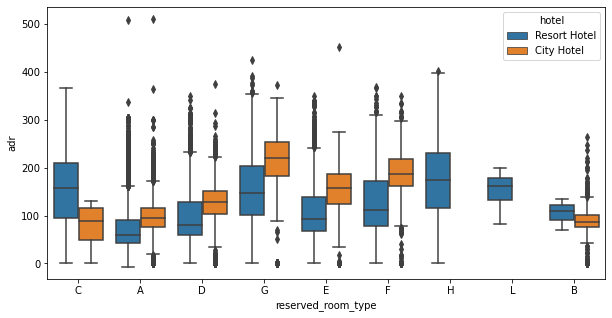

In [157]:
plt.figure(figsize=[10,5])
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

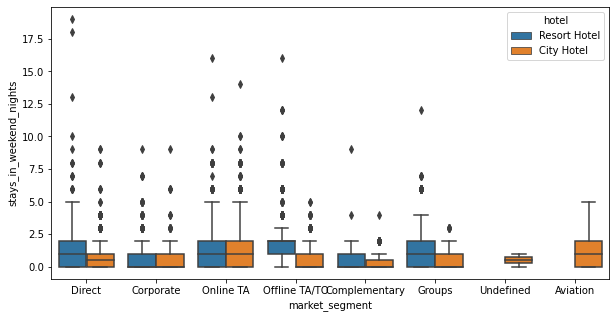

In [158]:
plt.figure(figsize=[10,5])
sns.boxplot(x='market_segment',y='stays_in_weekend_nights',data=data,hue='hotel')

In [159]:
px.pie(data,names=data['meal'].value_counts().index,values=data['meal'].value_counts(),hole=0.5)

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

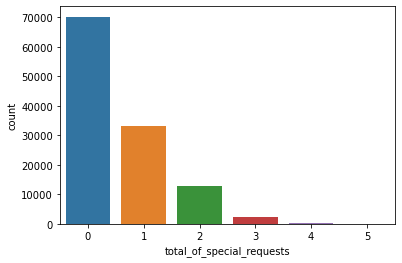

In [160]:
sns.countplot(data['total_of_special_requests'])

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

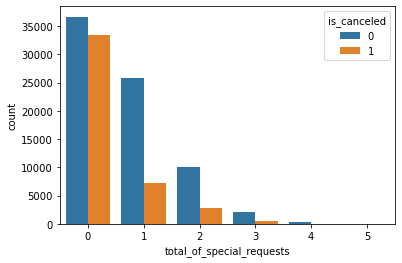

In [161]:
sns.countplot(data['total_of_special_requests'],hue=data['is_canceled'],)

In [162]:
print(x)

Index(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU', 'CN', 'NLD', 'USA', 'BEL',
       ...
       'BDI', 'MKD', 'BIH', 'MDG', 'DJI', 'SMR', 'HKG', 'LKA', 'NPL', 'EGY'],
      dtype='object', length=118)


In [163]:
x=resort['arrival_date_month'].value_counts().reset_index()
y=city['arrival_date_month'].value_counts().reset_index()

In [164]:
final_guest=x.merge(y,on='index')

In [165]:
final_guest.columns=['Month','Total Guest Resort', 'Total Guest City']

In [166]:
final_guest=sd.Sort_Dataframeby_Month(final_guest,'Month')

In [167]:
final_guest

,Month,Total Guest Resort,Total Guest City
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [168]:
px.line(final_guest,x='Month',y=['Total Guest Resort','Total Guest City'],title='Total Guest Per Month')

In [169]:
filter = (data['is_canceled']==0)
clean_data = data[filter]

In [170]:
clean_data['Total Nights'] = clean_data['stays_in_week_nights'] + clean_data['stays_in_weekend_nights']

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Total Nights', ylabel='count'>

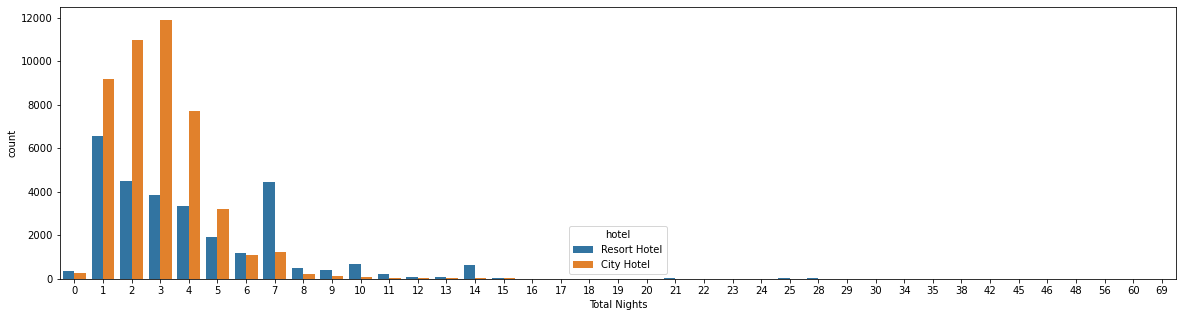

In [171]:
plt.figure(figsize=[20,5])
sns.countplot(clean_data['Total Nights'],hue=clean_data['hotel'])

In [172]:
px.pie(clean_data,names=clean_data['market_segment'].value_counts().index,values=clean_data['market_segment'].value_counts(),title='Booking Analysis according to Market Segment')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='market_segment', ylabel='adr'>

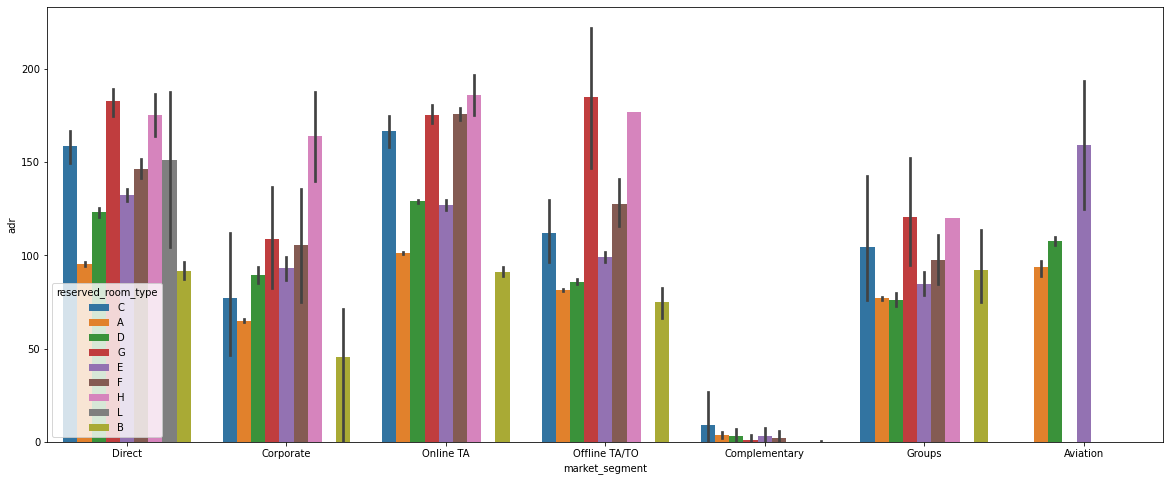

In [173]:
plt.figure(figsize=[20,8])
sns.barplot(x='market_segment',y='adr',hue='reserved_room_type',data=clean_data)

In [174]:
filter = (data['is_canceled']==1)
cancel = data[filter]

In [175]:
px.pie(values=[len(cancel[cancel['hotel']=='Resort Hotel']),len(cancel[cancel['hotel']=='City Hotel'])],names=['Resort Hotel','City_Hotel'])

In [176]:
resort_cancel = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 1)]
city_cancel = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 1)]

In [177]:
x1=resort_cancel['arrival_date_month'].value_counts().reset_index()
y1=city_cancel['arrival_date_month'].value_counts().reset_index()

In [178]:
final_guest_cancel=x1.merge(y1,on='index')

In [179]:
final_guest_cancel.columns=['Month','Total Guest Cancel Resort', 'Total Guest Cancel City']

In [180]:
final_guest_cancel=sd.Sort_Dataframeby_Month(final_guest_cancel,'Month')

In [181]:
final_guest_cancel

,Month,Total Guest Cancel Resort,Total Guest Cancel City
0,January,325,1481
1,February,794,1899
2,March,763,2385
3,April,1059,3459
4,May,1024,3653
5,June,1007,3527
6,July,1436,3301
7,August,1637,3600
8,September,1006,3109
9,October,978,3268


In [182]:
px.line(final_guest_cancel,x='Month',y=['Total Guest Cancel Resort','Total Guest Cancel City'],title='Total Guest Cancel Their Room Per Month')